In [1]:
import pandas as pd
import numpy as np

In [2]:
df2 = pd.read_csv("Stress.csv")

In [3]:
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator

In [4]:
from matplotlib import pyplot as plt

In [5]:
text = " ".join(i for i in df2["text"])

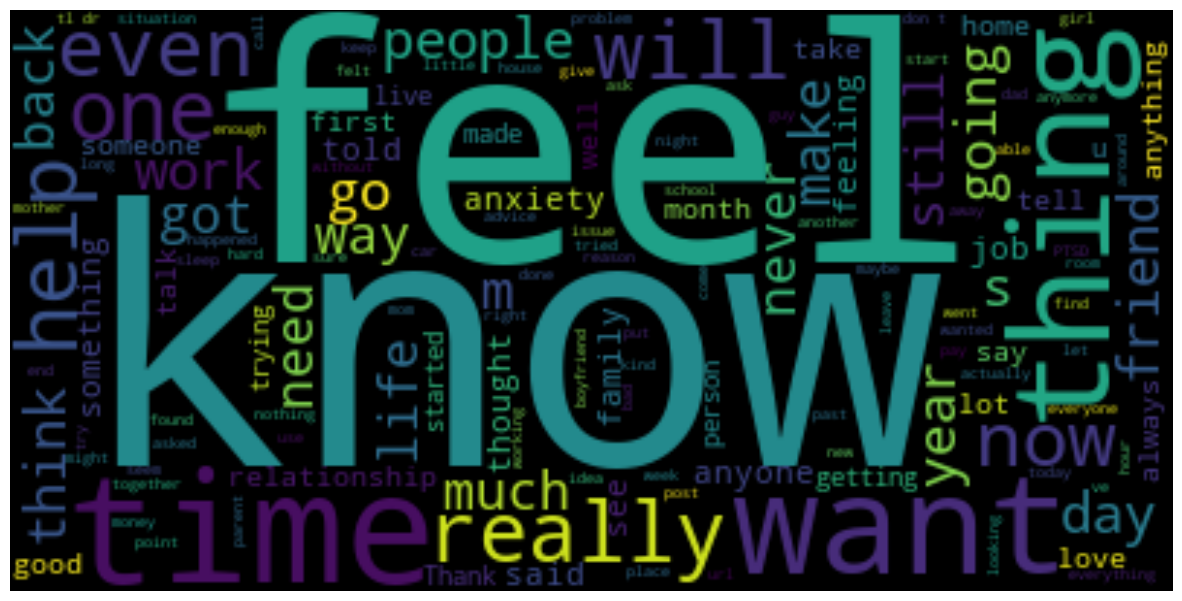

In [6]:
stopword = set(STOPWORDS)
wordclouds = WordCloud(stopwords= stopword , background_color= "black").generate(text)

plt.figure(figsize= (15 , 10))
plt.imshow(wordclouds , interpolation= "bilinear")
plt.axis("off")
plt.show()

In [7]:
# label[0] = "no stress" and label[1] = "stress"
df2["label"] = df2["label"].map({0 : "No Stress" , 1 : "Stress"})

## split train data and test data

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [9]:
x2 = np.array(df2["text"])
y2 = np.array(df2["label"])

In [10]:
cv = CountVectorizer()

In [11]:
x3 = cv.fit_transform(x2)

In [12]:
x2_train , x2_test , y2_train , y2_test = train_test_split(x3 , y2 , test_size= 0.2 , random_state= 42)

In [13]:
from sklearn.naive_bayes import BernoulliNB

In [14]:
model2 = BernoulliNB()

In [15]:
model2.fit(x2_train , y2_train)

BernoulliNB()

In [16]:
model2.score(x2_train , y2_train)

0.9330396475770925

## dump or save the model

In [17]:
from joblib import dump , load

In [18]:
dump(model2 , "StressConfidence2.joblib")

['StressConfidence2.joblib']

## using the models

In [19]:
my_model2 = load("StressConfidence2.joblib") # model 2

In [20]:
user = input("Enter your text: ")

Enter your text: I think he doesn't want to put in the effort for the relationship to work (and we're both so difficult that we have to work on our relationships, doesn't matter with whom) but he can't be without me either. What should I do? I'm afraid this is gonna happen over and over again, because I'm always forgiving him at some point. Am I being strung along? TL;DR: Boyfriend [28,M] broke up with me [23,F] after on-off for 1.5 years, I thought we just got it together and am devastated...don't know what to do, want to keep fighting but should I?


In [21]:
data = cv.transform([user]).toarray()

In [22]:
output = my_model2.predict(data)
print(output)

['Stress']


In [23]:
my_model = load("StressConfidence.joblib") # model 1

In [24]:
features = np.array([[0.95266102, -1.3536602]])
confidence = my_model.predict(features)

In [25]:
confidence

array([0.93971429])

In [26]:
if(confidence >= 0.8 and confidence <= 1.0) :
    if(output == "Stress") :
        print("Contact doctor as soon as possible")
    elif(output == "No Stress") :
        print("You are fine")

elif(confidence >= 0.5 and confidence < 0.8) :
    if(output == "Strees") :
        print("Need some therapy to treat this and take self care")
    elif(output == "No Stress") :
        print("You are fine")

elif(confidence >= 0.0 and confidence < 0.5) :
    if(output == "Stress") :
        print("No need to worry but take self care and take some rest")
    elif(output == "No Stress") :
        print("No need to worry but take self care and take some rest")

Contact doctor as soon as possible
